In [1]:
import pandas as pd # for wrirting and reading of datasets.
import numpy as np # for maticmathecal usage.
import seaborn as sns # for data visualization.
import statsmodels.formula.api as smf # for making the models.
data = pd.read_csv("E:\\EXCELR\\PARTH SIR\\inclass excercises\\ass\\Salary_Data.csv")

### EDA And Data Visualization

In [2]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

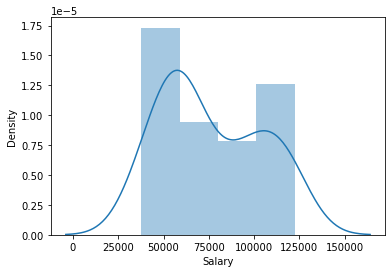

In [5]:
sns.distplot(data['Salary'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

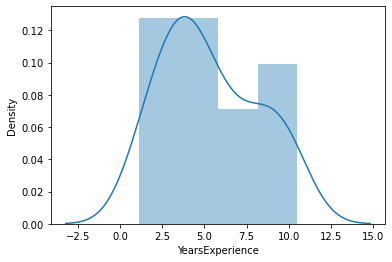

In [6]:
sns.distplot(data['YearsExperience'])

### Normal Model

In [7]:
model = smf.ols("Salary~YearsExperience",data = data).fit()

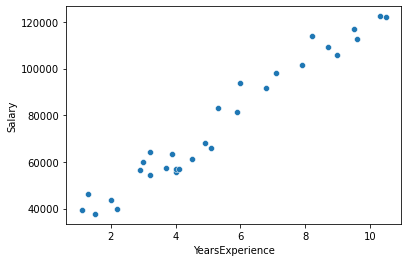

In [8]:
sns.scatterplot(x='YearsExperience',y="Salary",data=data);

model.params

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)   

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Using log Transformation 

In [12]:
# Dividing X as independant and  Y as dependent
X = np.log(data['Salary'])
Y = data[('YearsExperience')]

In [13]:
data1=pd.concat([Y,X],axis=1)

In [14]:
data1.head()

,YearsExperience,Salary
0,1.1,10.580073
1,1.3,10.740843
2,1.5,10.538237
3,2.0,10.681091
4,2.2,10.593906


### Creating the model for log Transformation.

In [15]:
model1 = smf.ols("Salary~YearsExperience",data = data1).fit()

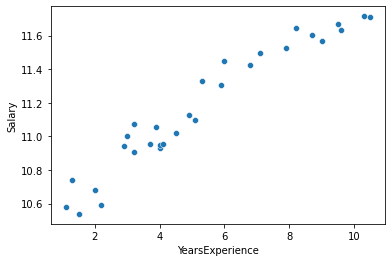

In [16]:
sns.scatterplot(x='YearsExperience',y="Salary",data = data1);

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

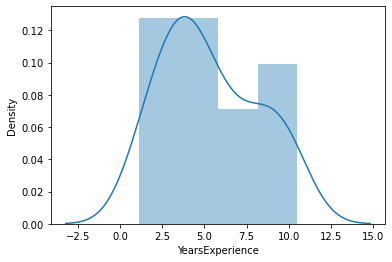

In [17]:
sns.distplot(data1['YearsExperience'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

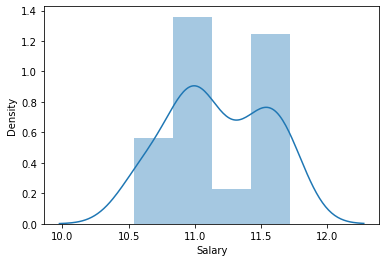

In [18]:
sns.distplot(data1['Salary'])

In [19]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.965384
Salary,0.965384,1.000000


In [20]:
model1.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [21]:
model1.tvalues,model1.pvalues

(Intercept          273.327166
 YearsExperience     19.584833
 dtype: float64,
 Intercept          1.604634e-49
 YearsExperience    7.027439e-18
 dtype: float64)

In [22]:
model1.rsquared,model1.rsquared_adj

(0.9319671194084194, 0.9295373736730057)

### Using Boxcox transformation

In [23]:
from scipy.stats import boxcox

In [24]:
x,_=boxcox(data['Salary'])

In [25]:
x=pd.Series(x,dtype=float,name='Salary')

In [26]:
data2=pd.concat([Y,x],axis=1)

In [27]:
data2.head()

,YearsExperience,Salary
0,1.1,15.936022
1,1.3,16.285303
2,1.5,15.845799
3,2.0,16.155010
4,2.2,15.965914


In [28]:
model2 = smf.ols("Salary~YearsExperience",data = data2).fit()

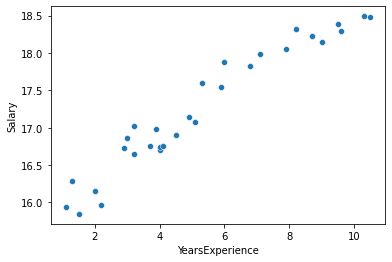

In [29]:
sns.scatterplot(x='YearsExperience',y="Salary",data = data2);

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

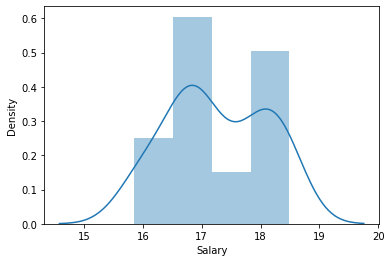

In [30]:
sns.distplot(data2['Salary'])

In [31]:
model2.params

Intercept          15.752114
YearsExperience     0.283357
dtype: float64

In [32]:
model2.tvalues,model2.pvalues

(Intercept          186.350884
 YearsExperience     20.117718
 dtype: float64,
 Intercept          7.255691e-45
 YearsExperience    3.477707e-18
 dtype: float64)

In [33]:
model2.rsquared,model2.rsquared_adj

(0.9352934131758689, 0.9329824636464357)

### Using sqrt transformation to build the model

In [34]:
x1 = np.sqrt(data['Salary'])
y1 = data[('YearsExperience')]

In [38]:
data3 = pd.concat([y1,x1],axis =1)

In [39]:
data3.head()

,YearsExperience,Salary
0,1.1,198.350700
1,1.3,214.953483
2,1.5,194.244691
3,2.0,208.626460
4,2.2,199.727314


In [40]:
model3 = smf.ols("Salary~YearsExperience",data = data3).fit()

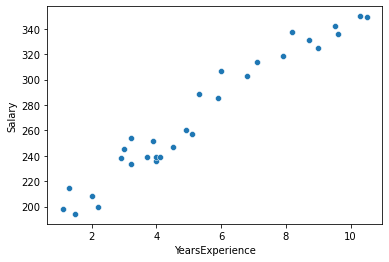

In [41]:
sns.scatterplot(x='YearsExperience',y="Salary",data = data3);

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

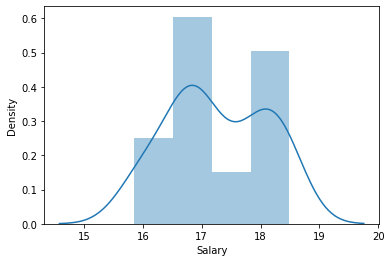

In [42]:
sns.distplot(data2['Salary'])

In [43]:
model3.params

Intercept          180.700221
YearsExperience     17.056532
dtype: float64

In [44]:
model3.tvalues,model3.pvalues

(Intercept          40.646251
 YearsExperience    23.025247
 dtype: float64,
 Intercept          1.920194e-26
 YearsExperience    9.782891e-20
 dtype: float64)

In [48]:
model.rsquared,model.rsquared_adj # Accuracy For Normal model after Eda

(0.9569566641435086, 0.9554194021486339)

In [49]:
model1.rsquared,model1.rsquared_adj # Accuracy For Log traformed model after Eda

(0.9319671194084194, 0.9295373736730057)

In [50]:
model2.rsquared,model2.rsquared_adj # Accuracy For boxcox transformed model after Eda

(0.9352934131758689, 0.9329824636464357)

In [47]:
model3.rsquared,model3.rsquared_adj # Accuracy For Square root transformed model after Eda

(0.9498353533865289, 0.9480437588646192)